<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/Logistic_regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
!pip install --upgrade xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Set seaborn style for better visualization
sns.set_style("darkgrid")

In [46]:
#load data
df = pd.read_csv('/content/bitcoin_analysis_engineered.csv')

In [47]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Coin,Year,Month,...,Quarter,Weekday,Daily_Return,Log_Return,EMA_7,EMA_30,RSI_14,MA_20,Upper_BB,Lower_BB
0,2014-10-06,320.389008,345.134003,302.559998,330.079010,79011800,6.542676e+09,Bitcoin,2014,10,...,4,0,0.029856,0.029419,349.294184,398.996478,30.138935,389.910399,461.027732,318.793066
1,2014-10-07,330.584015,339.247009,320.481995,336.187012,49199900,6.663746e+09,Bitcoin,2014,10,...,4,1,0.018505,0.018336,346.017391,394.944255,17.642549,383.853049,451.334641,316.371457
2,2014-10-08,336.115997,354.364014,327.187988,352.940002,54736300,6.995816e+09,Bitcoin,2014,10,...,4,2,0.049832,0.048630,347.748044,392.234303,27.775351,380.278049,446.265429,314.290669
3,2014-10-09,352.747986,382.726013,347.687012,365.026001,83641104,7.235380e+09,Bitcoin,2014,10,...,4,3,0.034244,0.033671,352.067533,390.478929,35.319233,378.789549,444.741094,312.838004
4,2014-10-10,364.687012,375.066986,352.963013,361.562012,43665700,7.166718e+09,Bitcoin,2014,10,...,4,4,-0.009490,-0.009535,354.441153,388.613321,36.159745,376.422450,441.211135,311.633765


In [48]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Coin,Year,Month,...,Quarter,Weekday,Daily_Return,Log_Return,EMA_7,EMA_30,RSI_14,MA_20,Upper_BB,Lower_BB
3774,2025-02-04,101398.718750,101745.617188,96208.109375,97871.820312,73002130211,1.939971e+12,Bitcoin,2025,2,...,1,1,-0.034846,-0.035468,100469.589618,100523.362256,33.348416,102479.762891,107101.351561,97858.174220
3775,2025-02-05,97878.007812,99113.210938,96174.828125,96615.445312,49125911241,1.915067e+12,Bitcoin,2025,2,...,1,2,-0.012837,-0.012920,99506.053541,100271.238582,35.095461,102322.689844,107512.527530,97132.852157
3776,2025-02-06,96610.640625,99168.609375,95707.351562,96593.296875,45302471947,1.914628e+12,Bitcoin,2025,2,...,1,3,-0.000229,-0.000229,98777.864375,100033.952021,34.207554,101929.252734,107606.385921,96252.119548
3777,2025-02-07,96581.320312,100154.140625,95653.882812,96529.085938,55741290456,1.913356e+12,Bitcoin,2025,2,...,1,4,-0.000665,-0.000665,98215.669766,99807.831628,31.600562,101535.303516,107570.378030,95500.229001
3778,2025-02-08,96541.492188,96871.734375,95853.882812,96026.765625,41132449792,1.903399e+12,Bitcoin,2025,2,...,1,5,-0.005204,-0.005217,97668.443730,99563.891886,31.052691,101282.161328,107801.263914,94763.058743


In [49]:
#check coins
df['Coin'].unique()

array(['Bitcoin'], dtype=object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3779 non-null   object 
 1   Open          3779 non-null   float64
 2   High          3779 non-null   float64
 3   Low           3779 non-null   float64
 4   Close         3779 non-null   float64
 5   Volume        3779 non-null   int64  
 6   Market Cap    3779 non-null   float64
 7   Coin          3779 non-null   object 
 8   Year          3779 non-null   int64  
 9   Month         3779 non-null   int64  
 10  Day           3779 non-null   int64  
 11  Quarter       3779 non-null   int64  
 12  Weekday       3779 non-null   int64  
 13  Daily_Return  3779 non-null   float64
 14  Log_Return    3779 non-null   float64
 15  EMA_7         3779 non-null   float64
 16  EMA_30        3779 non-null   float64
 17  RSI_14        3779 non-null   float64
 18  MA_20         3779 non-null 

In [51]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3779 entries, 0 to 3778
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3779 non-null   datetime64[ns]
 1   Open          3779 non-null   float64       
 2   High          3779 non-null   float64       
 3   Low           3779 non-null   float64       
 4   Close         3779 non-null   float64       
 5   Volume        3779 non-null   int64         
 6   Market Cap    3779 non-null   float64       
 7   Coin          3779 non-null   object        
 8   Year          3779 non-null   int64         
 9   Month         3779 non-null   int64         
 10  Day           3779 non-null   int64         
 11  Quarter       3779 non-null   int64         
 12  Weekday       3779 non-null   int64         
 13  Daily_Return  3779 non-null   float64       
 14  Log_Return    3779 non-null   float64       
 15  EMA_7         3779 non-null   float64 

## Exploratory Data Analysis

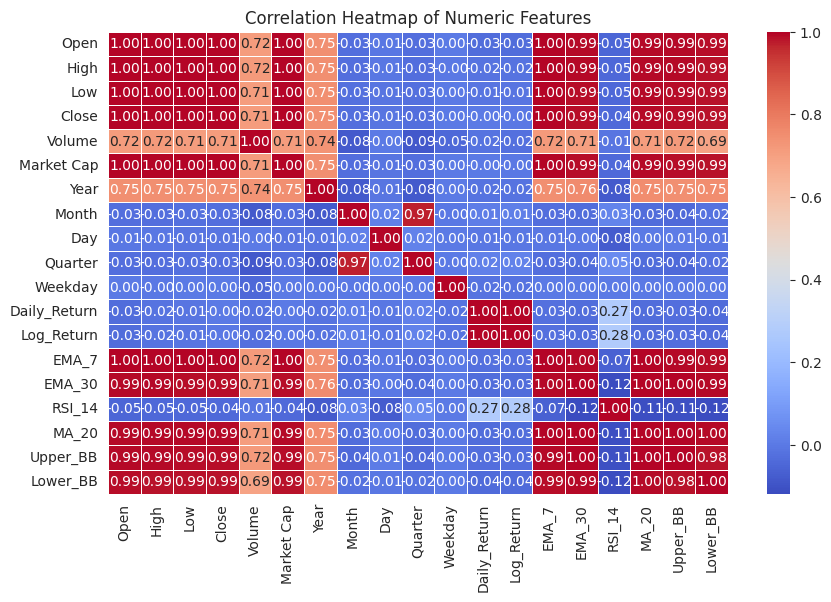

In [53]:
# Select only numeric columns
numeric_df = train.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [54]:
# Select numeric columns and compute the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Set correlation threshold for high correlation (e.g., 0.95)
threshold = 0.95

# Identify highly correlated features (excluding self-correlation)
highly_correlated_pairs = set()
selected_features = set(correlation_matrix.columns)

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.add((correlation_matrix.index[i], correlation_matrix.columns[j]))

# Remove redundant features (keeping one representative from each highly correlated pair)
features_to_remove = set()
for feature1, feature2 in highly_correlated_pairs:
    if feature2 in selected_features:
        features_to_remove.add(feature2)

selected_features -= features_to_remove

# Output correlation matrix and selected features
correlation_matrix, selected_features

(                  Open      High       Low     Close    Volume  Market Cap  \
 Open          1.000000  0.999596  0.999410  0.999148  0.674683    0.999148   
 High          0.999596  1.000000  0.999279  0.999641  0.680731    0.999641   
 Low           0.999410  0.999279  1.000000  0.999542  0.665485    0.999542   
 Close         0.999148  0.999641  0.999542  1.000000  0.674322    1.000000   
 Volume        0.674683  0.680731  0.665485  0.674322  1.000000    0.674322   
 Market Cap    0.999148  0.999641  0.999542  1.000000  0.674322    1.000000   
 Year          0.811051  0.809953  0.812618  0.811117  0.648612    0.811117   
 Month        -0.015949 -0.017081 -0.013825 -0.015820 -0.065791   -0.015820   
 Day          -0.001337 -0.001440 -0.000848 -0.001657 -0.010149   -0.001657   
 Quarter      -0.015275 -0.016478 -0.012889 -0.015021 -0.069545   -0.015021   
 Weekday       0.000783 -0.002171  0.003675  0.000313 -0.091914    0.000313   
 Daily_Return -0.022489 -0.008050 -0.007021  0.00468

In [55]:
# Feature selection (Dropping non-numeric or irrelevant columns)
features = [ 'Daily_Return',
  'Day',
  'Month',
  'Open',
  'RSI_14',
  'Volume',
  'Weekday',
  'Year']
target = 'Close'

In [56]:
# Train-test split
X = df[features]
y = df[target]

In [57]:
# Sort by Date to maintain the temporal order
df = df.sort_values(by="Date")

# Define split ratio (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.8)

# Train-test split without shuffling
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Separate features and target variable
X_train, y_train = train.drop(columns=["Close"]), train["Close"]
X_test, y_test = test.drop(columns=["Close"]), test["Close"]

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (3023, 20), Test size: (756, 20)


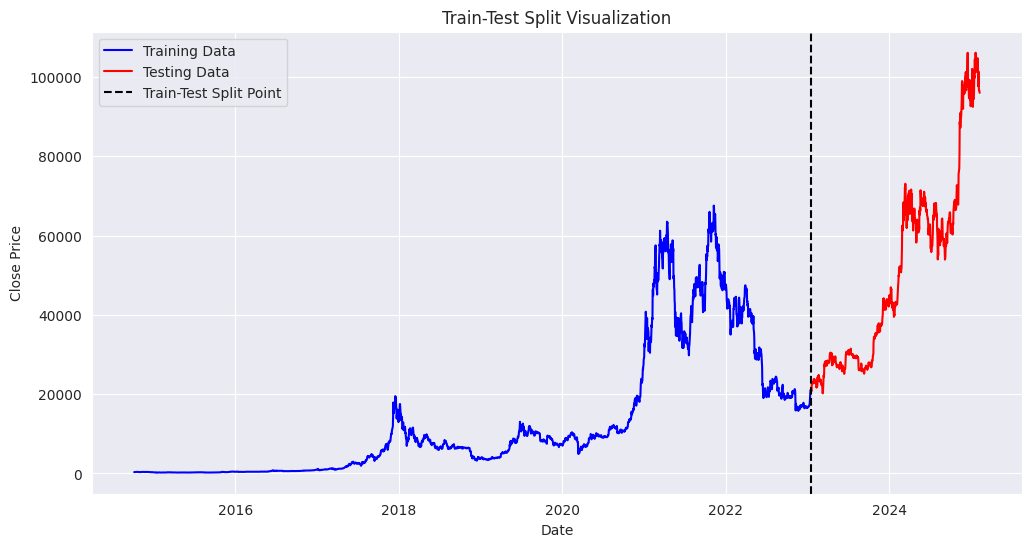

In [58]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(train["Date"], train["Close"], label="Training Data", color="blue")
plt.plot(test["Date"], test["Close"], label="Testing Data", color="red")
plt.axvline(x=test["Date"].iloc[0], color="black", linestyle="--", label="Train-Test Split Point")

# Labels and title
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Train-Test Split Visualization")
plt.legend()
plt.show()

In [59]:
# Drop non-numeric columns (Date, Coin, etc.)
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Standardizing the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Convert back to DataFrame (optional, for visualization)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns)

# Verify the transformation
print(X_train_scaled_df.head())
print(X_test_scaled_df.head())

       Open      High       Low    Volume  Market Cap     Year     Month  \
0 -0.781338 -0.780027 -0.783130 -0.820595   -0.781283 -1.83299  0.963984   
1 -0.780708 -0.780382 -0.781988 -0.822089   -0.780905 -1.83299  0.963984   
2 -0.780365 -0.779471 -0.781561 -0.821812   -0.779869 -1.83299  0.963984   
3 -0.779337 -0.777761 -0.780255 -0.820364   -0.779122 -1.83299  0.963984   
4 -0.778599 -0.778222 -0.779919 -0.822367   -0.779336 -1.83299  0.963984   

        Day   Quarter   Weekday  Daily_Return  Log_Return     EMA_7    EMA_30  \
0 -1.104659  1.286778 -1.499814      0.725381    0.727051 -0.780413 -0.778863   
1 -0.990962  1.286778 -0.999711      0.428492    0.439632 -0.780616 -0.779116   
2 -0.877266  1.286778 -0.499607      1.247887    1.225281 -0.780509 -0.779285   
3 -0.763569  1.286778  0.000496      0.840158    0.837319 -0.780241 -0.779395   
4 -0.649872  1.286778  0.500600     -0.303719   -0.283144 -0.780094 -0.779511   

     RSI_14     MA_20  Upper_BB  Lower_BB  
0 -1.265425 

## Modelling

### Linear Regression

In [60]:
# Define features (scaled)
X_train_lr = X_train_scaled_df
X_test_lr = X_test_scaled_df
y_train_lr = y_train
y_test_lr = y_test

In [61]:
# Initialize Linear Regression Model
lr_model = LinearRegression()

In [62]:
# Train the Linear Regression model
lr_model.fit(X_train_scaled_df, y_train)

LinearRegression()

### Prediction on Test Data

In [63]:
y_pred_lr = lr_model.predict(X_test_scaled_df)

### 📊 Visualize Predictions

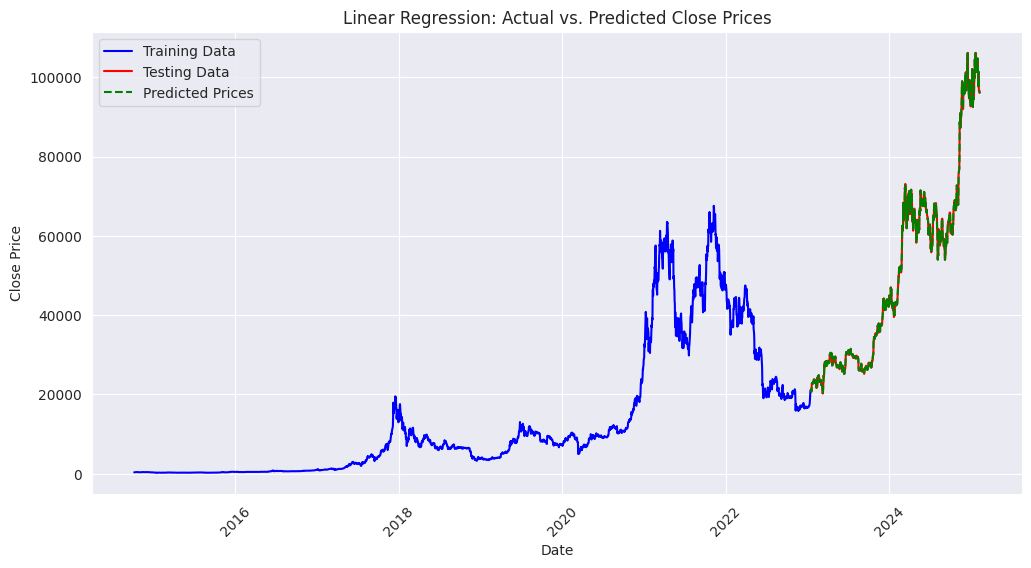

In [89]:
plt.figure(figsize=(12, 6))

# Plot Training Data
plt.plot(train["Date"], train["Close"], label="Training Data", color="blue")

# Plot Testing Data
plt.plot(test["Date"], test["Close"], label="Testing Data", color="red")

# Plot Predictions
plt.plot(test["Date"], y_pred_lr, label="Predicted Prices", color="green", linestyle="dashed")

# Labels and Title
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Linear Regression: Actual vs. Predicted Close Prices")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Model Evaluation
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)  # Mean Absolute Error
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)   # Mean Squared Error
rmse_lr = mse_lr ** 0.5  # Root Mean Squared Error
r2_lr = r2_score(y_test_lr, y_pred_lr)  # R² Score

# Print results
print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.4f}")

Linear Regression MAE: 0.00
Linear Regression MSE: 0.00
Linear Regression RMSE: 0.00
Linear Regression R² Score: 1.0000


### Random Forest

In [69]:
# Initialize Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [70]:
# Train on scaled data
rf_model.fit(X_train_scaled_df, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# Predictions
y_pred_rf = rf_model.predict(X_test_scaled_df)

In [72]:
# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

Random Forest MAE: 4280.44
Random Forest MSE: 122552824.19
Random Forest RMSE: 11070.36
Random Forest R² Score: 0.7841


### 📊 Visualize Predictions

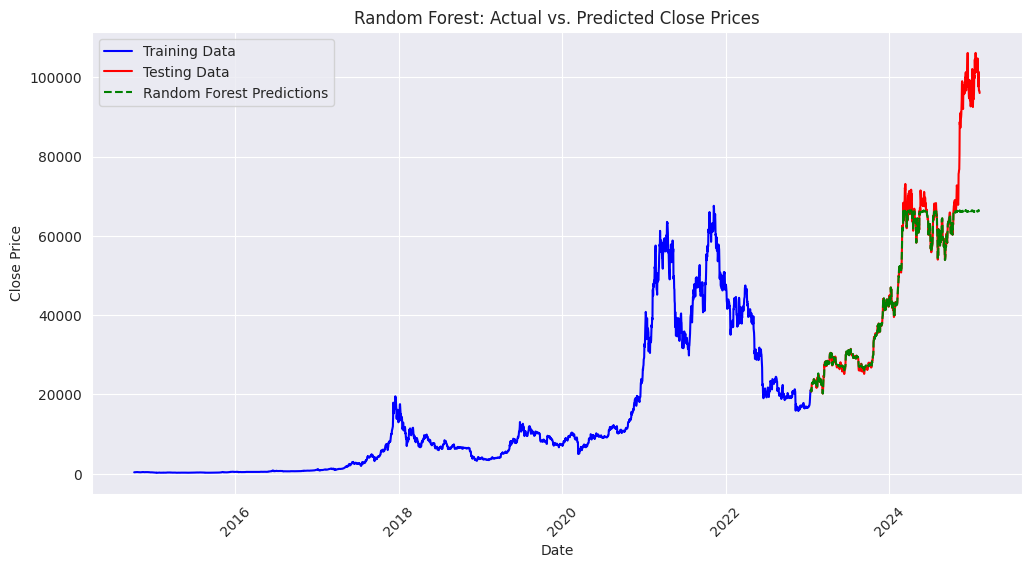

In [88]:
plt.figure(figsize=(12, 6))

# Plot Training Data
plt.plot(train["Date"], train["Close"], label="Training Data", color="blue")

# Plot Testing Data
plt.plot(test["Date"], test["Close"], label="Testing Data", color="red")

# Plot Predictions (Using Random Forest)
plt.plot(test["Date"], y_pred_rf, label="Random Forest Predictions", color="green", linestyle="dashed")

# Labels and Title
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Random Forest: Actual vs. Predicted Close Prices")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

In [81]:
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    verbosity=0,  # Set verbosity to 0 to suppress the error
    random_state=42
)


In [84]:
xgb_model.fit(X_train_scaled_df, y_train);
print("XGBoost training complete.")

XGBoost training complete.


In [85]:
# Predict on the test set using the trained XGBoost model
y_pred_xgb = xgb_model.predict(X_test_scaled_df)

In [86]:
# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")

XGBoost MAE: 4794.99
XGBoost MSE: 133228443.66
XGBoost RMSE: 11542.46
XGBoost R² Score: 0.7653


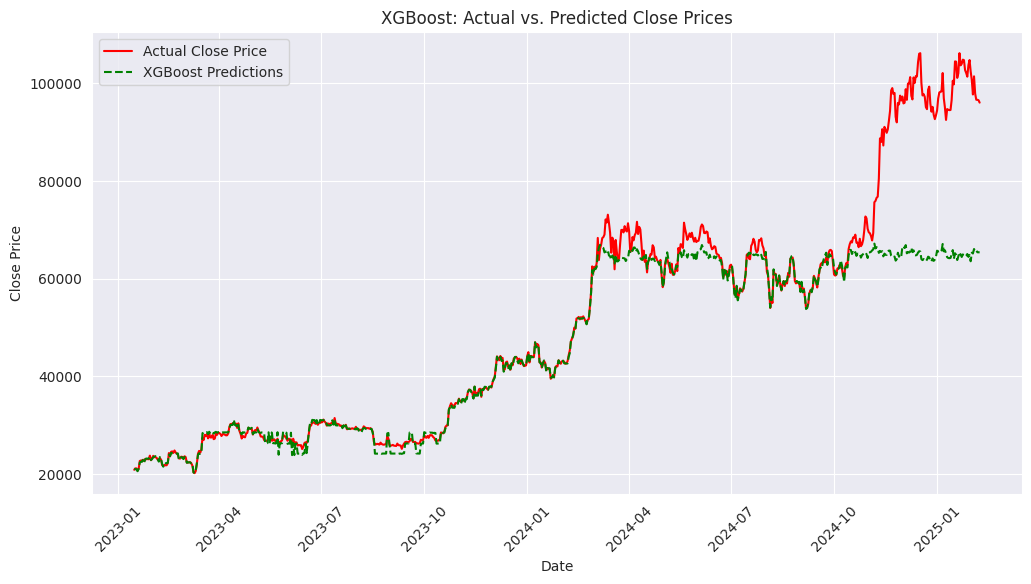

In [90]:
# Set a style for the plots
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))

# Plot the actual Close Price from the test data
plt.plot(test["Date"], test["Close"], label="Actual Close Price", color="red")

# Plot the XGBoost predictions
plt.plot(test["Date"], y_pred_xgb, label="XGBoost Predictions", color="green", linestyle="dashed")

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("XGBoost: Actual vs. Predicted Close Prices")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()